<a href="https://colab.research.google.com/github/milnico/masterAI4HU/blob/main/Lezione7_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron

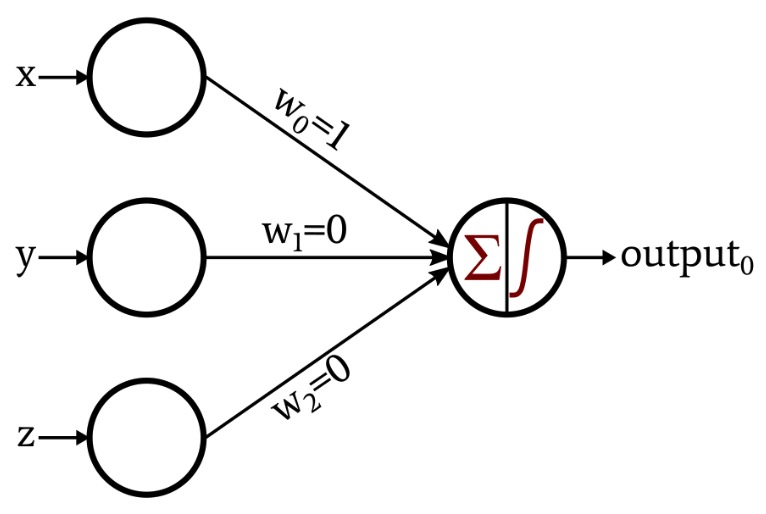

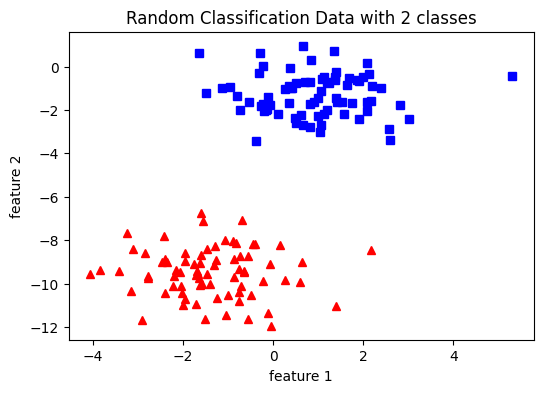

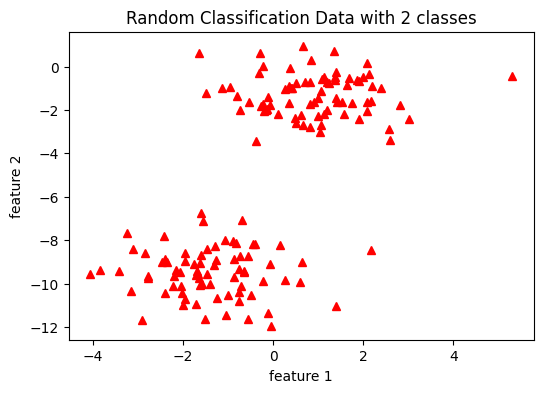

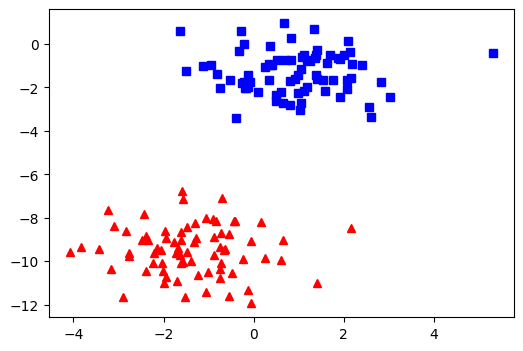

(600,)


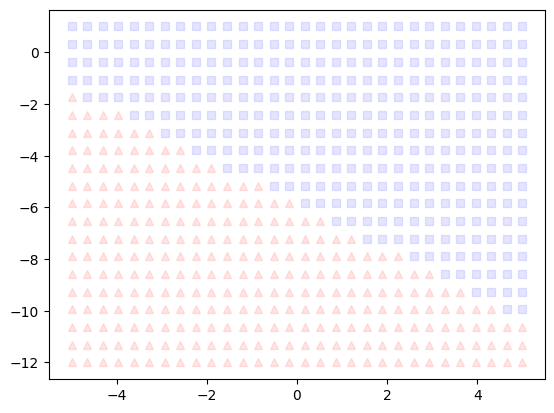

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
X, t = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)

#Plotting
fig = plt.figure(figsize=(6,4))
plt.plot(X[:, 0][t == 0], X[:, 1][t == 0], 'r^')
plt.plot(X[:, 0][t == 1], X[:, 1][t == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')
plt.show()

def create_grid():
  nx, ny = (30, 20)
  x = np.linspace(-5, 5, nx)
  y = np.linspace(-12, 1, ny)
  xv, yv = np.meshgrid(x, y)
  xx = xv.ravel()
  yy = yv.ravel()

  return np.array([xx,yy])

def step_func(z):
        return 1.0 if (z > 0) else 0.0



class Perceptron(object):
  def __init__(self,X, y, lr, epochs):

    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.

    # m-> number of training examples
    # n-> number of features

    self.m, self.n = np.shape(X)
    self.epochs = epochs
    self.lr=lr

    # Initializing parameters(weights) to zeros.
    # n+1 in 1 for the bias term.
    self.weights = np.random.random(size=(self.n+1,1))*0

  def train(self):
    # Training.
    for epoch in range(self.epochs):

        # variable to store #misclassified.
        n_miss = 0

        # looping for every example.
        for idx, x_i in enumerate(X):

            # Insering 1 for bias, X0 = 1.

            x_i = np.insert(x_i, 2, 1).reshape(1,self.n+1)

            # Calculating prediction/hypothesis.
            net_output = step_func(np.dot(x_i,self.weights))

            # Updating if the example is misclassified.
            if (np.squeeze(net_output) - t[idx]) != 0:

                self.weights -= self.lr*((net_output-t[idx] )*x_i.T)



    return self.weights

  def predict(self, inp):

    x_ = np.insert(inp, 2, 1,axis=1)#.reshape(len(inp),self.n+1)

    return(np.where(np.dot(x_,self.weights)>0,1,0))





w0 = np.random.random((np.shape(X)[1]+1,1))

perc = Perceptron(X, t, 0.5, 10)
init_response = np.squeeze(perc.predict(X))

#Plotting
fig = plt.figure(figsize=(6,4))
plt.plot(X[:, 0][init_response == 0], X[:, 1][init_response == 0], 'r^')
plt.plot(X[:, 0][init_response == 1], X[:, 1][init_response == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')
plt.show()


perc.train()


t_pred = np.squeeze(perc.predict(X))


fig = plt.figure(figsize=(6,4))
plt.plot(X[:, 0][t_pred==0], X[:, 1][t_pred==0], "r^")
plt.plot(X[:, 0][t_pred==1], X[:, 1][t_pred==1], "bs")
plt.show()


XX = create_grid().T
t_grid = np.squeeze(perc.predict(XX))
print(np.shape(t_grid))

plt.plot(XX[:, 0][t_grid==0], XX[:, 1][t_grid==0], "r^",alpha=0.1)
plt.plot(XX[:, 0][t_grid==1], XX[:, 1][t_grid==1], "bs",alpha=0.1)
plt.show()

(600, 2)


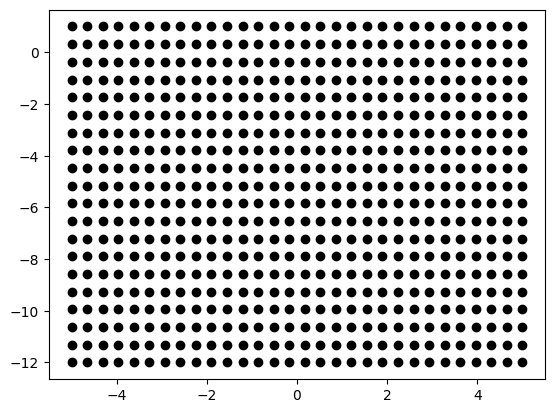

In [28]:
def create_grid():
  nx, ny = (30, 20)
  x = np.linspace(-5, 5, nx)
  y = np.linspace(-12, 1, ny)
  xv, yv = np.meshgrid(x, y)
  xx = xv.ravel()
  yy = yv.ravel()

  return np.array([xx,yy])
X = create_grid().T
print(np.shape(X))
plt.plot(X[:,0], X[:,1], marker='o', color='k', linestyle='none')
plt.show()

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,preprocessing
from tqdm import tqdm
train_inputs, train_targets = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=3,cluster_std=0.4,
                           random_state=2)



enc = preprocessing.OneHotEncoder()
enc.fit(train_targets.reshape(len(train_targets),1))
#  Transform
onehotlabels = enc.transform(train_targets.reshape(len(train_targets),1)).toarray()

#Plotting

plt.plot(train_inputs[:, 0][train_targets == 0], train_inputs[:, 1][train_targets == 0], 'r^')
plt.plot(train_inputs[:, 0][train_targets == 1], train_inputs[:, 1][train_targets == 1], 'bs')
plt.plot(train_inputs[:, 0][train_targets == 2], train_inputs[:, 1][train_targets == 2], 'g*')
plt.show()
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

def sigmoid(x):
    return 1/(1+np.exp(-x))

def step_function(x):
    return np.where(x<=0,0,1)

class NN(object):
    def __init__(self,inputs):
        self.inputs = inputs
        print(len(inputs[0]))
        self.output =3#len(inputs)
        self.li = len(inputs[0])
        self.wi = (2*np.random.random((self.li,self.h)))-1
        print(self.wi)
        input("pase")
        self.lr = 0.05


    def predict(self,inp):

        s1=step_function(np.dot(inp,self.wi))
        #s2=sigmoid(np.dot(s1,self.wh))
        return s1


    def train(self,outputs,epochs):
        for epoch in tqdm(range(epochs)):
          #print(epoch)
          # looping for every example.
          loss = []
          for i,x in enumerate(self.inputs):

              # Insering 1 for bias, X0 = 1.
              #print(self.inputs[self.batch*i:self.batch*(i+1)])
              #print(np.shape(self.inputs[self.batch*i:self.batch*(i+1)]))
              #input("jje")
              l0 = x.reshape((1,3))


              l1=step_function(np.dot(l0,self.wi))
              print(l1)
              input("pause")
              error = l1 - outputs[i].reshape(1,3)
              loss.append(np.mean(error))

              self.wi -= self.lr*np.dot(l0.T,error)

          #print(np.mean(loss))
train_inputs = np.insert(train_inputs,2,1,axis=1)
net = NN(train_inputs)
pred = net.predict(train_inputs)
pred = np.argmax(pred,axis=1)


plt.plot(train_inputs[:, 0][pred == 0], train_inputs[:, 1][pred == 0], 'r^')
plt.plot(train_inputs[:, 0][pred == 1], train_inputs[:, 1][pred == 1], 'bs')
plt.plot(train_inputs[:, 0][pred == 2], train_inputs[:, 1][pred == 2], 'g*')
plt.show()



net.train(onehotlabels,1000)

pred = net.predict(train_inputs)
pred = np.argmax(pred,axis=1)


plt.plot(train_inputs[:, 0][pred == 0], train_inputs[:, 1][pred == 0], 'r^')
plt.plot(train_inputs[:, 0][pred == 1], train_inputs[:, 1][pred == 1], 'bs')
plt.plot(train_inputs[:, 0][pred == 2], train_inputs[:, 1][pred == 2], 'g*')
plt.show()

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0.

KeyboardInterrupt: ignored